In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- species_info.csv - contains data about different species and their conservation status

- observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.

In [2]:
species_data = pd.read_csv("./species_info.csv")
print(species_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [3]:
print(species_data.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [4]:
observations_data = pd.read_csv("./observations.csv")
print(observations_data.info)

<bound method DataFrame.info of                                scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...          

In [5]:
print(observations_data.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


# Exploratory data analysis

First we need to understand the data. For example, 
    - how many different categories of species are there?

    - which is the most edangered category?

    - how many type of conservation status?

    - how many animals are there under each conservation type?

Then we want to answer the questions:
    - What is the distribution of conservation_status for animals?

    - Are certain types of species more likely to be endangered?

    - Are the differences between species and their conservation status significant?

    - Which species were spotted the most at each park?

    

In [6]:
# 1. How many different categories of species are there?
num_categories = species_data['category'].nunique()
print("Number of different categories of species:", num_categories)

Number of different categories of species: 7


In [7]:
# 2. Which is the most endangered category?
endangered_species = species_data[species_data['conservation_status'].notnull()]
most_endangered_category = endangered_species['category'].value_counts().idxmax()
print("Most endangered category:", most_endangered_category)

Most endangered category: Bird


In [8]:
# 3. How many types of conservation status?
num_conservation_statuses = species_data['conservation_status'].nunique()
print("Number of conservation status types:", num_conservation_statuses)

Number of conservation status types: 4


In [9]:
# 4. How many animals are there under each conservation type?
species_counts_by_status = species_data.groupby('conservation_status').size()
print("Animals under each conservation status:")
print(species_counts_by_status)

Animals under each conservation status:
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [10]:
# 5. What is the distribution of conservation_status for animals?
conservation_status_distribution = species_data['conservation_status'].value_counts()
print("Distribution of conservation status for animals:")
print(conservation_status_distribution)

Distribution of conservation status for animals:
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [11]:
# 6. Are certain types of species more likely to be endangered?
endangered_species_distribution = endangered_species['category'].value_counts(normalize=True)
print("Distribution of endangered species by category:")
print(endangered_species_distribution)

Distribution of endangered species by category:
Bird                 0.413613
Vascular Plant       0.240838
Mammal               0.198953
Fish                 0.057592
Amphibian            0.036649
Reptile              0.026178
Nonvascular Plant    0.026178
Name: category, dtype: float64


In [12]:
# 8. Which species were spotted the most at each park?
most_spotted_species = observations_data.groupby('park_name').apply(lambda x: x.loc[x['observations'].idxmax()]).reset_index(drop=True)
print("Most spotted species at each park:")
print(most_spotted_species[['park_name', 'scientific_name', 'observations']])


Most spotted species at each park:
                             park_name                  scientific_name  \
0                  Bryce National Park             Valerianella radiata   
1  Great Smoky Mountains National Park         Sonchus asper ssp. asper   
2            Yellowstone National Park           Lycopodium tristachyum   
3               Yosemite National Park  Ivesia shockleyi var. shockleyi   

   observations  
0           176  
1           147  
2           321  
3           223  


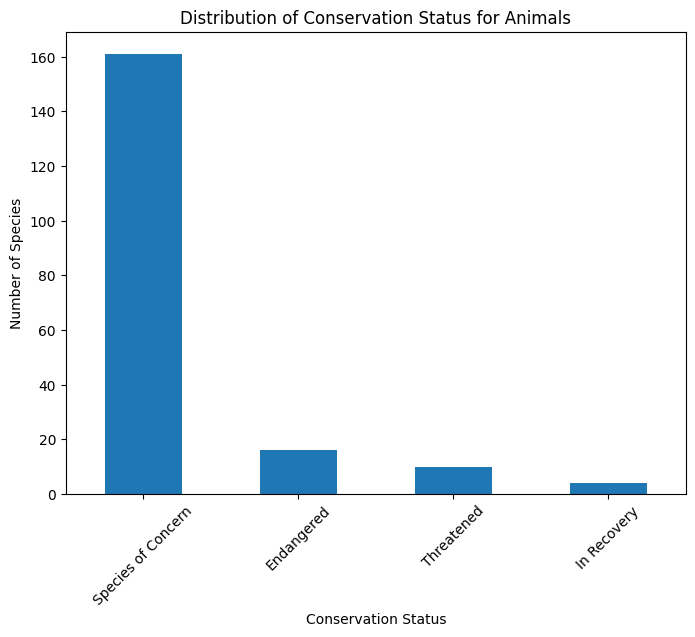

In [13]:
# Bar plot for distribution of conservation status for animals
plt.figure(figsize=(8, 6))
species_data['conservation_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Conservation Status for Animals')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

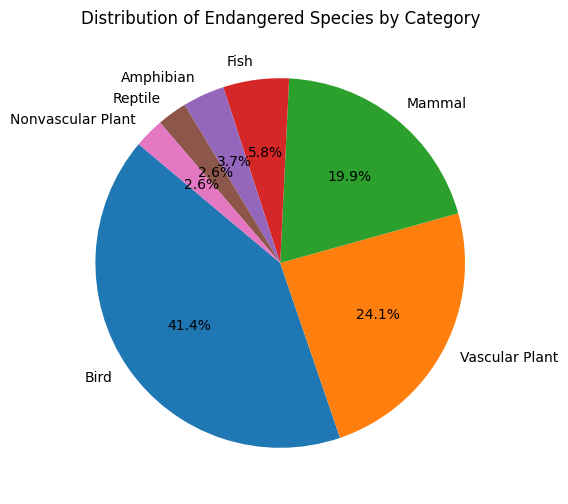

In [14]:
# Pie chart for distribution of endangered species by category
plt.figure(figsize=(8, 6))
endangered_species['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Endangered Species by Category')
plt.ylabel('')
plt.show()

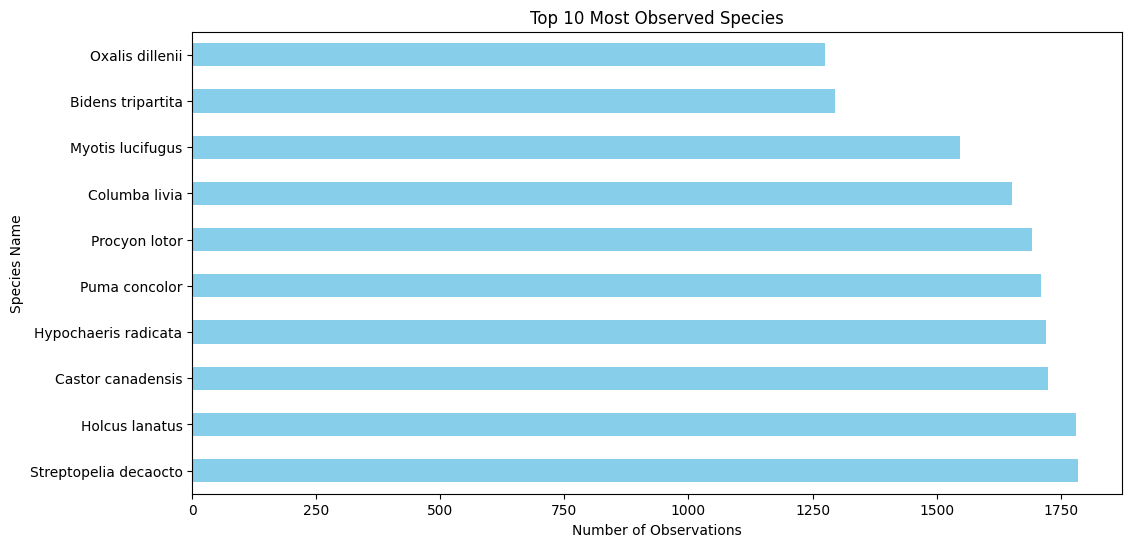

In [15]:
# Group observations data by species and sum the observations
observations_per_species = observations_data.groupby('scientific_name')['observations'].sum()

# Sort species by number of observations and select top N
top_species = observations_per_species.sort_values(ascending=False).head(10)

# Plot bar plot for top N species
plt.figure(figsize=(12, 6))
top_species.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Observed Species')
plt.xlabel('Number of Observations')
plt.ylabel('Species Name')
plt.show()


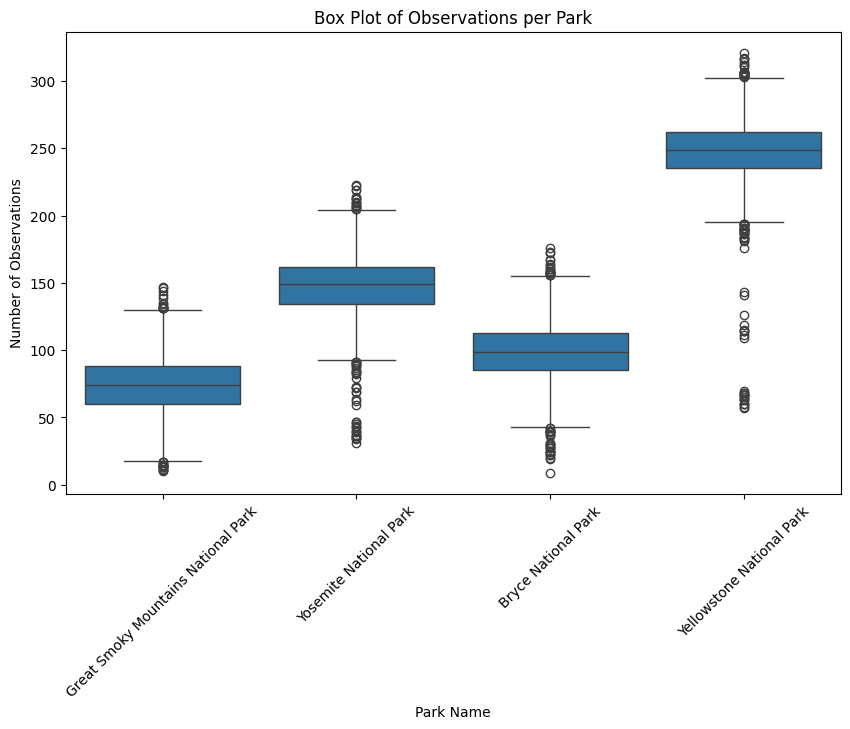

In [16]:
# Box plot for number of observations per park
plt.figure(figsize=(10, 6))
sns.boxplot(data=observations_data, x='park_name', y='observations')
plt.title('Box Plot of Observations per Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


We have the following categories: Vascular Plant, Bird ,Nonvascular Plant,Mammal, Fish, Amphibian, and Reptile. The dataset provides valuable insights into the distribution and abundance of species within the ecosystem. With 4470 species, vascular plants emerge as the dominant category, underscoring their pivotal role in the ecosystem. Birds follow closely behind, with 521 species, highlighting their significant presence as well. Nonvascular plants, mammals, fish, amphibians, and reptiles also contribute to the ecosystem's biodiversity, albeit with varying degrees of representation. This data not only offers a snapshot of species diversity but also informs conservation strategies, research priorities, and efforts to maintain ecological balance within the ecosystem.

The data reveals the conservation statuses of various species, shedding light on the urgency of protecting biodiversity. With 161 species classified as Species of Concern, and 16 identified as Endangered, the need for conservation efforts becomes apparent. Additionally, 10 species are categorized as Threatened, indicating their vulnerable status in the ecosystem. However, there is a glimmer of hope as four species are noted as In Recovery, suggesting successful conservation initiatives. This information underscores the importance of conservation efforts and provides valuable insights for prioritizing resources and implementing effective strategies to safeguard endangered species and promote ecosystem health.